# **Airline Data Analysis**

## **Business Problem**
---

Our company operates a diverse fleet of aircraft ranging from small business jets to medium-sized machines. We have been providing high-quality air transportation service to our clients for several years, and our primary focus is to ensure a safe, comfortable, and convenient journey for our passengers. However, we are currently facing challenges due to several factors such as stricter enviromental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market resulting in increased labor costs. As a result, the company's profitability is under pressure, and they are seeking ways to address this issue. To tackle this challenge, they are looking to conduct an analysis of their database to find ways to increase their occupancy rate, which can help boost the average profit earned per seat.

## **Main Challenges**

1. **Stricter enironmental regulations:** The demand on the airlines industry to decrease its carbon footprint is growing, which has resulted in more strigent environmental laws that raise operating costs and restrict expansion potential.
   
2. **Higher flight taxes:** To solve environmental issues and increase money, governments all around the world are taxing aircraft more heavily, which raised the cost of flying and decrease demand.
   
3. **Tight labor market resulting in increased labor costs:** The lack of trained people in the aviation sector has increased labor costs and increased turnover rates.

## **Objectives**

1. **Increase occupancy rate:** By increasing the occupancy rate, we can boost the average profit earned per seat and mitigate the impact of the challenges we're facing.
   
2. **Improve pricing strategy:** We need to develop a pricing strategy that takes into account the changing market conditions and customer preferences to attract and retain customers.
   
3. **Enhance customer experience:** We need to focus on providing a seamless and convenient experience for our customers, from booking to arrival to differentiate ourselves in a highly competitive industry and increased customers loyalty.

The end goal of this task would be to identify oppertunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
cursor.execute("""Select name from sqlite_master where type = 'table';""")
print("Table List")
table_list = [table[0] for table in cursor.fetchall()]
table_list

Table List


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## **Data Exploration**

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [6]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
flights = pd.read_sql_query("select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
seats = pd.read_sql_query("select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [11]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [12]:
for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [13]:
# check the missing value in all tables
for table in table_list:
    print('\ntable:', table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


## **Basic Analysis**

**How many planes have more than 100 seats?**

In [14]:
# How many planes have more than 100 seats?
pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", connection)


,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


The basics analysis of data provides insights into the number of planes with more than 100 seats, how the number of tickets booked and total amount earned changed over time, and the average fare for each aircraft with different fare conditions. These findings will be useful in developing strategies to increase occupancy rates and optimize pricing for each aircraft. Table 1 shows the aircraft with more than 100 seats and the actual count of the seats.


**How the number of tickets booked and total amount earned changed with the time?**

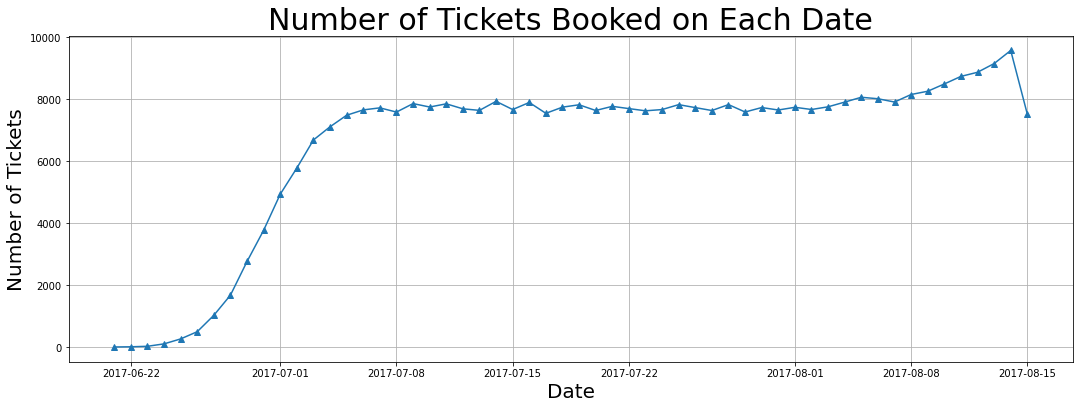

In [15]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])

tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], marker = '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

In order to gain a deeper understanding of the trend of tickets bookings and revenue earned through those bookings, we have utilized a line chart visualization. Upon analysis of the chart, we observe that the number of tickets booked exhibits a gradual increase from June 22nd to July 7th, followed by a relatively stable pattern from July 8th until August, with a noticeable peak in ticket bookings where the highest number of tickets were booked on a single day. It is important to note that the revenue earned by the company from these bookings is closely tied to the number of tickets booked. Therefore, we can see a similar trend in the total revenue earned by the company throughout the analyzed time period. These findings suggest that further exploration of the factors contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.

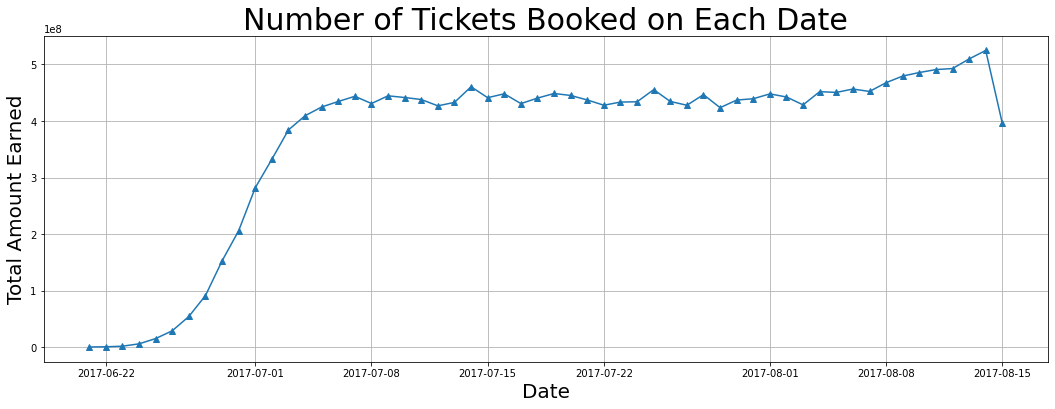

In [16]:
bookings = pd.read_sql_query("select * from bookings", connection)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'], marker = '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions?**

In [17]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)
df.to_csv('fare_avg_amount.csv')

<AxesSubplot:xlabel='aircraft_code', ylabel='avg(amount)'>

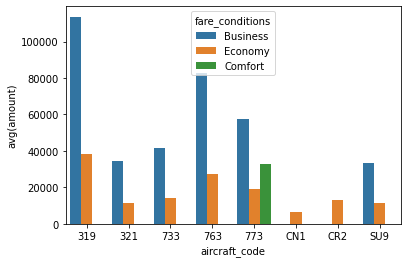

In [18]:
sns.barplot(data= df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

We are able to generate a bar graph to graphically compare the data after we completed the computations for the average costs associated with different fare conditions for each aircraft. The graph Figure 3 shows data for the three types of fare: business, economy, and confort. It is worth mentionning that the comfort class is available on only one craft, the 773. The CN1 and CR2 planes, on the other hand, only procide the economy class. When different pricing circumstances within each aircraft are compared, the charges for business class are consistently greater than those for economy class. This trend may be seen across all planes, regardless of fare conditions.

## **Analyzing Oaccupancy Rate**

Airlines must thoroughly analyze their revenue streams in order to maximize profitability. The overall income per year and average revenue per ticket for each aircraft are important metrics to consider. Airlines may use this information to determine which aircraft types and itineraries generate the most income and alter their operations appropriately. This research can also assist in identifying potntial for pricing optimization and allocating resources to more profitable routes. The below figure 4 shows the total revenue, total tickets and average revenue made per ticket for each aircraft. The aircraft with the highest total revenue is SU9 and from the figure 3 it can be seen that the price of the business class and economy class is the lowest in this aircraft. This can be the reason that most of the people bought this aircraft ticket as its cost is less compared to others. The aircraft with least total revenue is CN1, and the possible reason behind this is it only offers economy class with very least price and it might be becuase of its poor conditions or less facilities.

The average occupancy per aircraft is another critical number to consider. Airlines may measure how successfully they fill their seats and discover chances to boost occupancy rate by using this metric. Higher occuapancy rates can help airlines increase revenue and profitability while lowering operational expenses associated with vacant seats. Pricing strategy, airline schedules, and customer statisfaction are all factor that might influence occupancy rates. The below figure 5 shows the average booked seats from the total number of seats for each aircraft. The occupancy rate is calculated by dividing the booked seats by the total number of seats. Higher occupancy rate means the aircraft seats are more booked and only few seats are left unbooked.

Airlines can assess how much their total yearly turnover could improve by providing all aircraft a 10% higher occupancy rate to further examine the possible benefits of raising occupancy rates. This research can assist airlines in determining the financial impact of boosting occupancy rates and if it is a realistic strategy. Airline may enhance occupancy rates and revenue while delivering greater value and service to consumers. by optimizing pricing tactics and other operational considerations. The below figure shows how the total revenue increased after increasing the occupancy rate by 10% and it gives the result that it will increase gradually so airlines should be more focused on the pricing strategies.


**For each aircraft, calculate the total revenue per year and the average revenue per ticket.**

In [19]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", connection)
revenue.to_csv('revenue.csv')

**Calculate the average occupancy per aircraft**

In [20]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection
                  )
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [21]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [22]:
pd.set_option("display.float_format",str)

In [23]:
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", connection)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


## **Conclusion**

To summarize, analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is critical for airlines seeking to maximize profitability. Airlines can find areas for improvement and modify their pricing and route plans as a result of assessing these indicators. A greater occupancy rate is one important feature that can enhance profitability since it allows airlines to maximize revenue while minimizing costs associated with vacant seats. The airline should revise the price for each aircraft as the lower price and high price is also the factor that people are not buying tickets from those aircrafts. They should decide the reasonable price according to the condition and facility of the aircraft and it should not be very cheap or high.

Furthermore, boosting occuoancy rates should not come at the price of consumer happines or safety. Airlines must strike a balance between the necessity for profit and the significance of delivering high-quality service and upholding safety regulations. Airlines may achieve long-term success in a highly competitive business by adopting a data-driven strategy to revenue analysis and optimisation.